Lets Predict a model that can classify whether a passenger would survive  or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## **Data Understanding**

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Since we come to know that the dataset contains NULL values in ['age', 'embarked', 'deck', 'embark_town'], we can do something for all the columns except the deck becz more than 50% of the data is missing so its advisable to drop out that column

We use heatmap to visualize the data

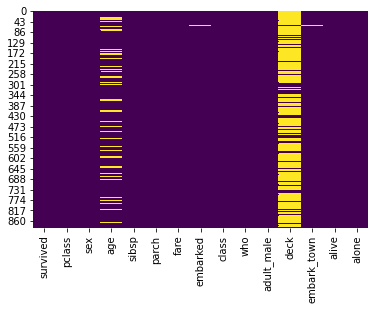

In [8]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [9]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

From the above code we found out the percentage of null values in age column

Now lets check the distribution of the age

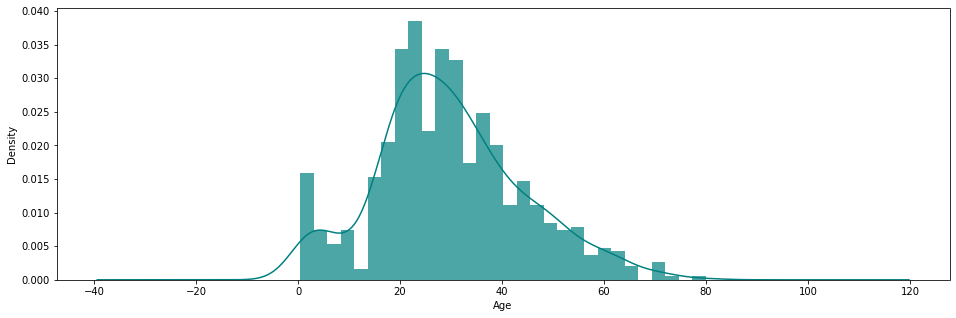

In [10]:
#drawing the histogram
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16,5)) 
#fitting the density function
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

From the above density func we are able to see that age group of around 30 are more on the ship

Now lets see the distribution of surviving people according to age. With this we can see what is the factor of age in survival

Text(0.5, 1.0, 'Male')

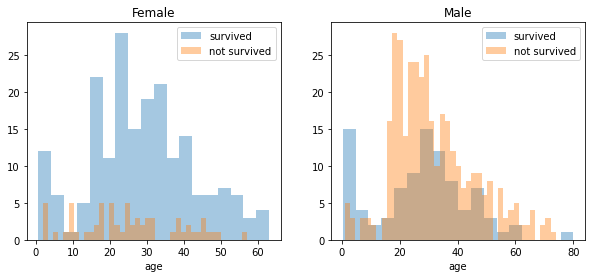

In [11]:
 survived = 'survived'
 not_survived = 'not survived'

 fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
#lets see how many women are there
 women = titanic[titanic['sex'] == 'female']
 men = titanic[titanic['sex'] == 'male']

 ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
 ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
 ax.legend()
 ax.set_title('Female')

 ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
 ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
 ax.legend()
 ax.set_title('Male')

From the above plots, mostly male passengers have not survived. But if we have a look at children they have survived. So definetly Sex and Age are two important factors. Moreover the overall survival of women is more than male

In [12]:
#no of male and female passengers boarded on ship 
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

Now, lets examine the relation between the passenger class and age. For this we can go for categorical plot

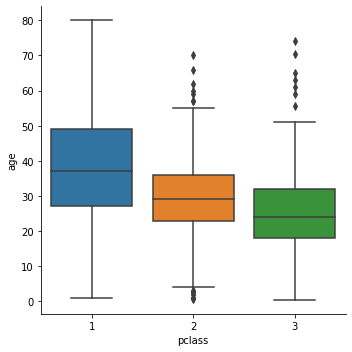

In [13]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box') 

From the above plot, we can see that age group of 30-50 travel in 1st class, 25-40 in 2nd class and 20-30 in 3rd class.. As the class of the passenger increase, their respective age increases

Now lets go ahead and see the fare with passenger class

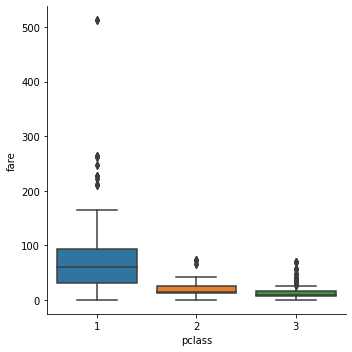

In [14]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box') 

As expected, the fare increases from 3rd class to 1st class..

Now lets see the mean of age of first class passenger and similarly 2nd and 3rd class

In [15]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [16]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [17]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

As we got the mean age of the respective classes, we fill the null values in age with respect to the class 

In [18]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
    else:
        return age


In [19]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age , axis = 1)

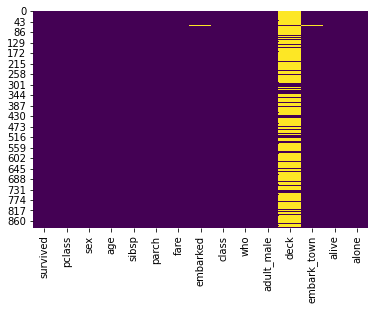

In [20]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

Here we have successfully filled all the null valued age column

## **Analysing Embarked**

For analysing embarked, we are going to create Facetgrid

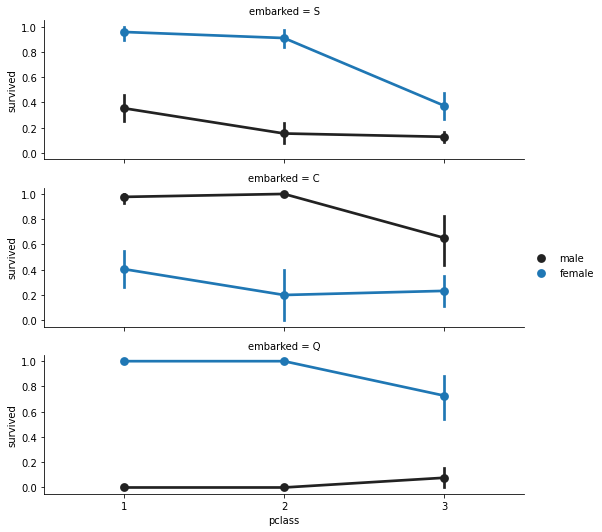

In [21]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect = 3)

f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

From the above plots, we come to know that survival rate of males are more who have embarked = C whereas for S and Q no of females are higher. With this info, lets fill in the missing values

In [22]:
titanic['embarked'].isnull().sum()

2

In [23]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [24]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [25]:
titanic['embarked'].isnull().sum()

0

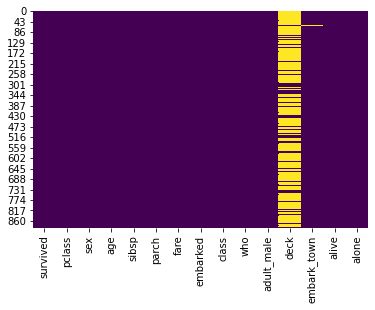

In [26]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

We are going to drop the 'deck' column. Along with it we have to drop embark_town and alive also

In [27]:
titanic.drop(labels = ['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

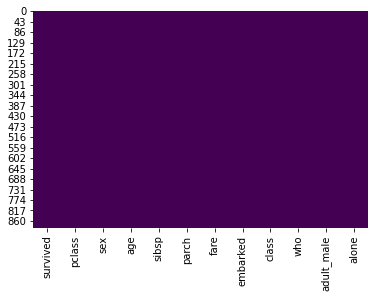

In [28]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

# **Feature Transformation**
Here we are going to do label encoding

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [31]:
#We can do this with label encoding also.. here we are doing it as naive one
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,True


In [33]:
who = {'man':0, 'woman':1, 'child':2}
titanic['who'] = titanic['who'].map(who)

In [34]:
adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)
titanic['alone'] = titanic['alone'].map(adult_male)

In [35]:
ports = {'S':0, 'C':1, 'Q':2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [36]:
classes = {'First':1, 'Second':2, 'Third':3}
titanic['class'] = titanic['class'].map(classes)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,3,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,3,1,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,1,0,0
4,0,3,0,35.0,0,0,8.0500,0,3,0,1,1


In [74]:
titanic.drop(labels = ['class','who'], inplace = True, axis = 1)

Building Logistic Regression Model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

In [77]:
print(X.shape)
print(y.shape)

(891, 9)
(891,)


In [103]:
def log_model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 8, stratify = y)
    
    model = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
    model.fit(X_train,y_train)

    y_predict = model.predict(X_test)

    #print(model.score(X_test,y_test)) 

    return (X_train,X_test,y_train,y_test,y_predict,model)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape

(596, 9)

In [80]:

model = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.8271186440677966

#Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


[link text](https://drive.google.com/file/d/1OL24g8Qh_Z1XAXdGPwmJ4PZ0hvgQvbGq/view?usp=sharing)

In [82]:
from sklearn.feature_selection import RFE

In [84]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose = 1)
rfe = rfe.fit(X,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [85]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [86]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,0,35.0,0,0,8.0500,0,1,1


In [87]:
X.head()  

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [88]:
XX = X[X.columns[rfe.support_]]
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [92]:
log_model(XX,y)

0.8547486033519553


#Accuracy, F1-Score, P, R, AUC_ROC Curve

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [104]:
X_train,X_test,y_train,y_test,y_predict, model = log_model(XX,y)

In [110]:
y_predict_prob = model.predict_proba(X_test)[:,1]


In [111]:
[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)

In [112]:
print('Accuracy: ',accuracy_score(y_test, y_predict))
print('Log loss: ',log_loss(y_test,y_predict))
print('auc: ',auc(fpr,tpr))

Accuracy:  0.8547486033519553
Log loss:  5.016854647147541
auc:  0.9007246376811595


Now we are going to calculate ROC_AUC curve. To do that, we need to get minimum of tpr where tpr>0.95

In [113]:
idx = np.min(np.where(tpr>0.95))
idx

27

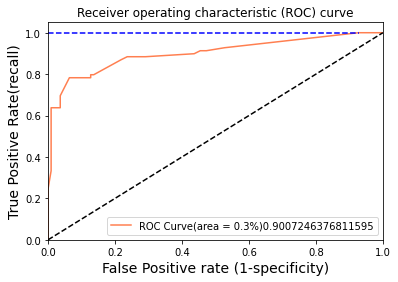

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [118]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC Curve(area = 0.3%)' +str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate (1-specificity)', fontsize = 14)
plt.ylabel('True Positive Rate(recall)',fontsize = 14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

print('Using a threshold of %.3f ' % thr[idx] + 'guarantees a sensitivity of %.3f '%tpr[idx] + 'and a specificity of %.3f' %(1-fpr[idx]) + 
      ', i.e. a false positive rate of %.2f%%.' %(np.array(fpr[idx])*100))